In [1]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [2]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [3]:
INT_df = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df_with_aggregate"+".msgpack")
tv_series_mislabelled_as_a_movie = INT_df[INT_df["TMB_tv_not_film"]==1].index
INT_df.drop(tv_series_mislabelled_as_a_movie,inplace=True)

In [ ]:
# get rid of low sample size r_values
pers_r_variables = [x for x in INT_df.columns if re.match("PERS_\w+_r",x)]

for pers_var in pers_r_variables:
    INT_df.loc[ INT_df[pers_var.replace("_r","_p")]>.16  , pers_var ] = np.nan
    

In [4]:
list_of_dummy_prefixes = ["original_language","spoken_languages","production_countries",
                          "production_companies","keyword","cast","crew"]
list_of_dummy_prefixes =[]

INT_df_ord_only = INT_df.copy() # work with a safe copy

object_columns = INT_df_ord_only.columns[INT_df.dtypes=="object"]
INT_df_ord_only.drop(object_columns,axis=1,inplace=True)

dummy_reg_exp = "TMB_("+"|".join(list_of_dummy_prefixes)+")_"
dummy_columns = [x for x in INT_df_ord_only.columns if re.match(dummy_reg_exp,x)]
if "TMB_crew_size" in dummy_columns: dummy_columns.remove("TMB_crew_size")
if "TMB_cast_size" in dummy_columns: dummy_columns.remove("TMB_cast_size") 

INT_df_ord_only.drop(dummy_columns,axis=1,inplace=True)

id_columns = [x for x in INT_df_ord_only.columns if re.search("Id|_id|ID",x)]
id_columns.extend(["TMB_collectionId","TMB_original_language","NUM_scrape_count","NUM_page_no"])
INT_df_ord_only = INT_df_ord_only.drop(id_columns,axis=1)

sample_size_variables = [x for x in INT_df_ord_only.columns if re.search("_n$|_n_x$|_n_y$",x.lower())]
INT_df_ord_only = INT_df_ord_only.drop(sample_size_variables,axis=1)

# normalised_variables = [x for x in INT_df_ord_only.columns if re.search("normalised",x.lower())]
# INT_df_ord_only = INT_df_ord_only.drop(normalised_variables,axis=1)

unnormalised_variables = [x.split("_normalised")[0] for x in INT_df.columns if re.search("normalised",x.lower())]
INT_df_ord_only = INT_df_ord_only.drop(unnormalised_variables,axis=1)


alternate_year_variables = ["TMB_years_since_first_movie","TMB_release_decade","TMB_release_year","NUM_release_year","HETREC_year",
                            "TMB_release_month","NUM_release_month","TMB_release_day","NUM_release_day"]
INT_df_ord_only = INT_df_ord_only.drop(alternate_year_variables,axis=1)

excess_gross_variables = ['NUM_domestic_gross','NUM_international_gross','NUM_worldwide_gross_divided_by_budget',
                          'TMB_budget_normalised', 'TMB_revenue_normalised', 'TMB_revenue_divided_by_budget_normalised',
                          'NUM_worldwide_gross',
                          'NUM_production_budget']
INT_df_ord_only = INT_df_ord_only.drop(excess_gross_variables,axis=1)


excess_hetrec_variables = ['HETREC_rtAllCriticsNumFresh','HETREC_rtAllCriticsNumRotten',
                           'HETREC_rtTopCriticsNumFresh','HETREC_rtTopCriticsNumRotten']
INT_df_ord_only = INT_df_ord_only.drop(excess_hetrec_variables,axis=1)

# p_values
pers_p_values = [x for x in INT_df_ord_only.columns if re.search("_p$",x.lower())]
INT_df_ord_only = INT_df_ord_only.drop(pers_p_values,axis=1)

# SER variables
excess_ser_variables = [x for x in INT_df_ord_only.columns if re.search("SER_(predictedRating|s\d|s_|q|m)",x)]
INT_df_ord_only = INT_df_ord_only.drop(excess_ser_variables,axis=1)

# choose one of score/rating/fraction -> noise_variance suggests keep score, ditch rest
excess_hetrec_variables = [x for x in INT_df_ord_only.columns if re.search("HETREC_rt\w*(Rating$)|FractionFresh",x)]
INT_df_ord_only = INT_df_ord_only.drop(excess_hetrec_variables,axis=1)

# 
too_low_variation = ["TMB_adult","TMB_video"]
INT_df_ord_only = INT_df_ord_only.drop(too_low_variation,axis=1)

Other_variables = [x for x in INT_df_ord_only.columns if "_Other" in x]
INT_df_ord_only = INT_df_ord_only.drop(Other_variables,axis=1)


In [2]:
ratings_cols = ['HETREC_rtAudienceScore', 'HETREC_rtAudienceNumRatings',
       'HETREC_rtTopCriticsNumReviews', 'HETREC_rtAllCriticsNumReviews',
       'ML_ratings_mean', 'SER_ratings_mean', 'TMB_vote_average_normalised',
       'HETREC_rtAllCriticsScore', 'PERS_ratings_mean', 'HETREC_ratings_mean',
       'TMB_vote_count', 'TMB_popularity_normalised',
       'SER_rating',"HETREC_rtTopCriticsScore",
        'HETREC_ratings_std','SER_ratings_std','PERS_ratings_std','ML_ratings_std']


# _ratings_std

In [33]:
[x for x in INT_df_ord_only.columns if "popularity" in x]

['TMB_popularity_normalised']

In [36]:
pattern = "|".join(ratings_cols)
name = "TMB_vote_count"
corr_type = "spearman"
df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r,p,N
gross_normalised,0.72,0.00,8554
budget_normalised,0.64,0.00,9848
TMB_crew_size,0.48,0.00,44591
TMB_num_production_companies,0.47,0.00,45354
mean_order_crew_mean,0.45,0.00,42108
gross_by_budget_normalised,0.44,0.00,6699
TMB_num_keywords,0.43,0.00,25957
TMB_cast_size,0.41,0.00,42944
TMB_num_genres_per_movie,0.33,0.00,45354
credit_number_crew_lead5,0.33,0.00,44591


In [16]:
# Needed for Factor Analysis
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [267]:
ratings_cols

['HETREC_rtAudienceScore',
 'HETREC_rtAudienceNumRatings',
 'HETREC_rtTopCriticsNumReviews',
 'HETREC_rtAllCriticsNumReviews',
 'ML_ratings_mean',
 'SER_ratings_mean',
 'TMB_vote_average_normalised',
 'HETREC_rtAllCriticsScore',
 'PERS_ratings_mean',
 'HETREC_ratings_mean',
 'TMB_vote_count',
 'TMB_popularity_normalised',
 'SER_rating',
 'HETREC_rtTopCriticsScore',
 'HETREC_ratings_std',
 'SER_ratings_std',
 'PERS_ratings_std',
 'ML_ratings_std']

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


Wall time: 10.4 s


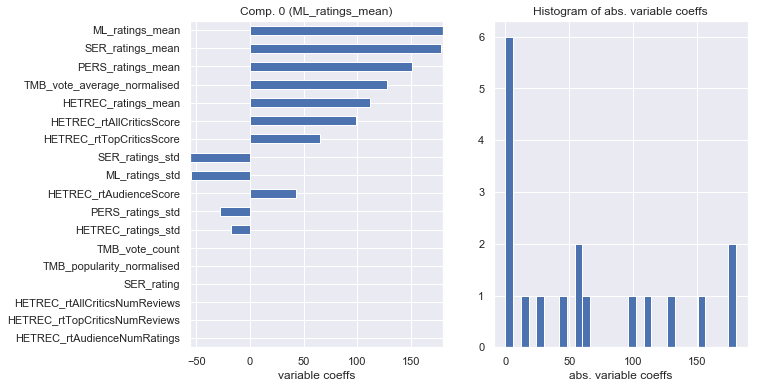

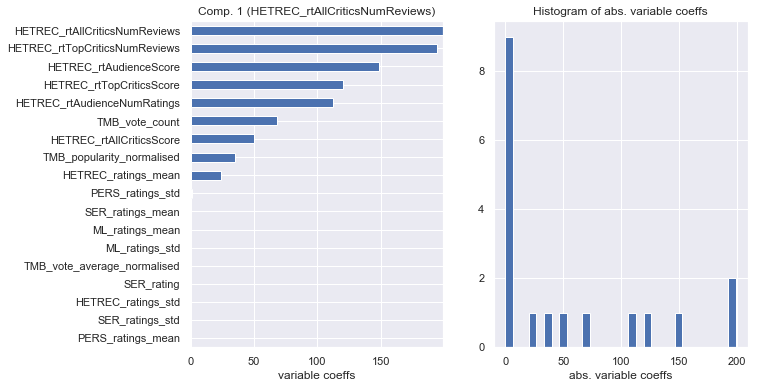

In [38]:
%%time

df = INT_df_ord_only[ratings_cols].copy()

df = df.fillna(df.mean())




output_subfolder = ".."+os.sep+"Output"+os.sep + "ratings_fusion" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    

# standardise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df.columns,
                             index   = df.index      )



n_components = BES_std.shape[1]
n_components = 2
alpha = 18
# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp = SparsePCA(n_components = n_components, alpha = alpha)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df.index)



load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method


# display_pca_data(n_components, decomp, BES_std)



(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df.columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = True)

In [65]:
INT_df.loc[1314                        ].dropna()

movieId                                                                             1314
TMB_movieId                                                                         1314
TMB_adult                                                                              0
TMB_belongs_to_collection                                                              0
TMB_original_language                                                                  0
TMB_original_title                                                        Breathing Room
TMB_overview                           She's Kathy, a comix cartoonist; he's David, t...
TMB_popularity                                                                  0.028988
TMB_poster_path                                         /qCRHQSeVQ2pscu8ntonD5fzYRUX.jpg
TMB_production_companies                                                          [1002]
TMB_production_countries                                                          ['US']
TMB_release_date     

In [51]:
Quality.sort_values(ascending=False)

movieId
64418    0.014331
1203     0.014147
26082    0.014136
5368     0.014107
3224     0.013837
42783    0.013384
32525    0.013035
3819     0.012961
2019     0.012948
7926     0.012820
2931     0.012794
2839     0.012701
3030     0.012688
922      0.012677
2859     0.012660
3435     0.012649
1189     0.012629
6669     0.012621
7941     0.012601
904      0.012599
318      0.012582
5690     0.012576
8684     0.012530
1254     0.012524
858      0.012475
926      0.012458
750      0.012435
908      0.012433
3338     0.012407
1361     0.012383
           ...   
2555    -0.017684
5734    -0.017692
4781    -0.017822
6482    -0.017925
5356    -0.018027
5647    -0.018123
1990    -0.018179
5736    -0.018191
4125    -0.018265
54268   -0.018421
7120    -0.018479
6587    -0.018673
50798   -0.018830
54290   -0.018875
6872    -0.019055
32088   -0.019140
7244    -0.019320
5737    -0.019386
3593    -0.019430
31424   -0.019820
7282    -0.019901
1826    -0.020118
31698   -0.020373
64999   -0.020637
62

In [57]:
Exposure.sort_values(ascending=False)

movieId
53125    0.075893
54001    0.071560
4201     0.070951
54286    0.065925
56757    0.064748
54272    0.061370
52722    0.060880
53121    0.060640
53972    0.057009
45       0.054849
58559    0.054109
60072    0.050404
53322    0.047325
8972     0.047244
56775    0.047050
7285     0.045711
55765    0.043770
56174    0.043607
7153     0.043223
51662    0.041776
50872    0.041221
3884     0.040570
4993     0.040476
54004    0.040351
5952     0.040315
33794    0.039311
52245    0.039248
52458    0.038886
45722    0.038293
60069    0.037268
           ...   
5194    -0.012941
32646   -0.012942
8979    -0.012958
31090   -0.012962
8931    -0.012962
1420    -0.012970
2981    -0.012982
4858    -0.012984
8070    -0.012996
26007   -0.013000
5767    -0.013004
8580    -0.013011
8037    -0.013031
678     -0.013058
658     -0.013060
6147    -0.013088
824     -0.013104
63768   -0.013123
1364    -0.013187
26048   -0.013198
64906   -0.013201
1708    -0.013223
1716    -0.013268
5912    -0.013284
76

In [87]:
high_exposure = Exposure>Exposure.quantile(0.9999)
low_exposure = Exposure<Exposure.quantile(0.0001)

high_quality = Quality>Quality.quantile(0.9999)
low_quality = Quality<Quality.quantile(0.0001)

In [102]:
INT_df[high_exposure][["TMB_title","TMB_overview"]]

,TMB_title,TMB_overview
movieId,,
4201,The End,Wendell Lawson has only six months to live. No...
53125,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
54001,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...
54272,The Simpsons Movie,After Homer accidentally pollutes the town's w...
54286,The Bourne Ultimatum,Bourne is brought out of hiding once again by ...
56757,Sweeney Todd: The Demon Barber of Fleet Street,"The infamous story of Benjamin Barker, a.k.a S..."


In [103]:
INT_df[low_exposure][["TMB_title","TMB_overview"]]

,TMB_title,TMB_overview
movieId,,
844,The Story of Xinghua,This Chinese melodrama presents an allegory ti...
1314,Breathing Room,"She's Kathy, a comix cartoonist; he's David, t..."
1423,Hearts and Minds,In the final days of the pro-apartheid governm...
3226,Hellhounds on My Trail: The Afterlife of Rober...,Hellhounds On My Trail is a tribute to the inf...
7644,Divorce Iranian Style,DIVORCE IRANIAN STYLE unfolds inside an Irania...
26073,The Human Condition III: A Soldier's Prayer,"The Japanese forces having been shattered, Kaj..."


In [80]:
INT_df[high_quality][["TMB_title","TMB_overview"]]

,TMB_title,TMB_overview
movieId,,
1203,12 Angry Men,The defense and the prosecution have rested an...
3224,Woman in the Dunes,"Jumpei Niki, a Tokyo based entomologist and ed..."
5368,Ballad of a Soldier,"During World War II, 19 year old soldier Alyos..."
26082,Harakiri,Peace in 17th-century Japan causes the Shoguna...
42783,Shadows of Forgotten Ancestors,"In a Carpathian village, Ivan falls in love wi..."
64418,A Man Named Pearl,Man Named Pearl tells the inspiring story of s...


In [81]:
INT_df[low_quality][["TMB_title","TMB_overview"]]

,TMB_title,TMB_overview
movieId,,
4775,Glitter,Similar to Mariah's life story. Mariah plays t...
5739,Faces of Death VI,A direct-to-video compilation of the highlight...
6483,From Justin to Kelly,"A lonely, sexually repressed man. A depressed ..."
8859,Superbabies: Baby Geniuses 2,"Following on from the plot of the last movie, ..."
61348,Disaster Movie,"In DISASTER MOVIE, the filmmaking team behind ..."
62299,Alone in the Dark 2,"When the night falls, and the creatures of the..."


In [104]:
INT_df[ (Quality<Quality.quantile(0.01))&
        (Exposure>Exposure.quantile(0.99))][["TMB_title","TMB_overview","release_year"]]

,TMB_title,TMB_overview,release_year
movieId,,,
4201,The End,Wendell Lawson has only six months to live. No...,1978.0
5716,Butterfly,"Orson Welles, as judge Rauch, holds a lengthy ...",1982.0
6024,Breaking Up,"An aloof, struggling food photographer thinks ...",1997.0
7411,Munchies,"Simon Watterman, a space archaeologist, discov...",1987.0
8531,White Chicks,"Two FBI agent brothers, Marcus and Kevin Copel...",2004.0
53131,Rise: Blood Hunter,A young reporter (Lucy Liu) wakes up and reali...,2007.0
54004,I Now Pronounce You Chuck & Larry,Firefighters Chuck Ford and Larry Valentine ar...,2007.0


In [105]:
INT_df[ (Quality>Quality.quantile(0.98))&
        (Exposure<Exposure.quantile(0.02))][["TMB_title","TMB_overview","release_year"]]

,TMB_title,TMB_overview,release_year
movieId,,,
722,"The Haunted World of Edward D. Wood, Jr.",The strange life and the wonderfully awful fil...,1996.0
2938,Man Facing Southeast,A new patient mysteriously appears in a psychi...,1986.0
5194,Who's Singin' Over There?,"On April 5, 1941, a day before Nazi attack on ...",1980.0
6134,Starstruck,A new-wave extravaganza in which a young woman...,1982.0
8936,Life and Nothing But,"January, 1920. 350,000 French soldiers remain ...",1989.0
26113,The Best Man,The other party is in disarray. Five men vie f...,1964.0
32649,A Special Day,The film is set during the late 1930s: the occ...,1977.0
33340,Kids Return,Shinji and Masaru spend most of their school d...,1996.0
52767,21 Up,"After another 7 year wait, director Michael Ap...",1977.0


In [94]:
[x for x in INT_df.columns if "year" in x]

['TMB_release_year',
 'TMB_years_since_first_movie',
 'HETREC_year',
 'NUM_release_year',
 'release_year']

In [96]:
# I wonder if MovieLens would like to pay me for fixing their data?
INT_df.loc[8688,"SER_releaseDate"] = "1968-12-13" # Shalako 13 December 1968
INT_df.loc[33471,"SER_releaseDate"] = "2002-04-05" # https://www.imdb.com/title/tt0292553/?ref_=fn_al_tt_1
INT_df.loc[46121,"SER_releaseDate"] = "2001-06-01" # https://www.imdb.com/title/tt0135024/releaseinfo?ref_=tt_dt_dt
INT_df.loc[47991,"SER_releaseDate"] = "2005-06-09" # https://www.imdb.com/title/tt0383304/releaseinfo?ref_=tt_dt_dt
INT_df.loc[42941,"SER_releaseDate"] = "1974-08-08" # https://www.imdb.com/title/tt0071840/releaseinfo?ref_=tt_dt_dt
INT_df.loc[59300,"SER_releaseDate"] = "1986-09-12" # https://www.imdb.com/title/tt0090678/releaseinfo?ref_=tt_dt_dt
INT_df.loc[55631,"SER_releaseDate"] = "2006-03-17" # https://www.imdb.com/title/tt0443446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[60034,"SER_releaseDate"] = "2007-01-22" # https://www.imdb.com/title/tt0893331/releaseinfo?ref_=tt_dt_dt
INT_df.loc[97703,"SER_releaseDate"] = "2012-05-07" # https://www.imdb.com/title/tt2209386/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105159,"SER_releaseDate"] = "2012-07-13" # https://www.imdb.com/title/tt1859446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105453,"SER_releaseDate"] = "2013-09-19" # https://www.imdb.com/title/tt2717558/releaseinfo?ref_=tt_dt_dt
INT_df.loc[105855,"SER_releaseDate"] = "2013-10-11" # https://www.imdb.com/title/tt2286990/releaseinfo?ref_=tt_dt_dt
INT_df.loc[109455,"SER_releaseDate"] = "2014-02-21" # https://www.imdb.com/title/tt2980794/releaseinfo?ref_=tt_dt_dt
INT_df.loc[57486,"SER_releaseDate"] = "1970-10-23" # https://www.imdb.com/title/tt0066578/releaseinfo?ref_=tt_dt_dt
INT_df.loc[53502,"SER_releaseDate"] = "1948-04-27" # https://www.imdb.com/title/tt0040098/releaseinfo?ref_=tt_dt_dt
INT_df.loc[60049,"SER_releaseDate"] = "2007-05-30" # https://www.imdb.com/title/tt0832937/releaseinfo?ref_=tt_dt_dt

INT_df["SER_releaseDate"] = pd.to_datetime(INT_df["SER_releaseDate"].replace("0000-00-00",np.nan)).apply(lambda x: x.date())
INT_df["SER_release_year"]  = INT_df["SER_releaseDate"].apply(lambda x: x.year)
INT_df["SER_release_month"] = INT_df["SER_releaseDate"].apply(lambda x: x.month)
INT_df["SER_release_day"]   = INT_df["SER_releaseDate"].apply(lambda x: x.day)

# this represents a very informal sensse of which source is most authoritative!
# TMB user content - least reliable, NUM website focused on accurate
# HETREC and SER are MovieLens data - not bad, but maybe not so well checked (HETREC in particular has problems)

# Concerned that HETREC is really very dodgy

INT_df["release_year"] = INT_df[['HETREC_year','TMB_release_year','SER_release_year','NUM_release_year']].fillna(method="ffill",axis=1)["NUM_release_year"]

INT_df["release_month"] = INT_df[['TMB_release_month','SER_release_month','NUM_release_month']].fillna(method="ffill",axis=1)["NUM_release_month"]

INT_df["release_day"] = INT_df[['TMB_release_day','SER_release_day','NUM_release_day']].fillna(method="ffill",axis=1)["NUM_release_day"]

In [ ]:
##############################################################################################

# can we reduced PERS big 5 variables to just two factors?




In [226]:
pers_variables = [x for x in INT_df.columns if re.match("PERS_(a|c|e|o|n)\w+_(mean|r|std)",x)]
pers_variables

['PERS_agreeableness_mean',
 'PERS_agreeableness_r',
 'PERS_agreeableness_std',
 'PERS_conscientiousness_mean',
 'PERS_conscientiousness_r',
 'PERS_conscientiousness_std',
 'PERS_emotional_stability_mean',
 'PERS_emotional_stability_r',
 'PERS_emotional_stability_std',
 'PERS_extraversion_mean',
 'PERS_extraversion_r',
 'PERS_extraversion_std',
 'PERS_openness_mean',
 'PERS_openness_r',
 'PERS_openness_std']

In [124]:
INT_df["PERS_openness_r"].corr(INT_df["HETREC_ratings_mean"],method='spearman')

0.20074799092163445

In [159]:
# mask = INT_df["PERS_openness_p"]<=.05
pers_var = "PERS_openness_r"

pattern = "|".join(pers_variables)
name = pers_var
corr_type = "spearman"
df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
highest_corr_variable = df.head(1).index[0]

p_thresh=0.05

corr_between_pers_var_and_top_corr(p_thresh, pers_var, highest_corr_variable)

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


0.8404374595252643

In [216]:
def corr_between_pers_var_and_top_corr(p_thresh, pers_var, highest_corr_variable):
    mask = INT_df[pers_var.replace("_r","_p")]<=p_thresh[0]
    return -np.abs(INT_df[pers_var][mask].corr(INT_df[highest_corr_variable][mask],method='spearman'))

In [168]:
# from scipy import optimize
# initial = np.array([0.05])
# res = optimize.minimize(corr_between_pers_var_and_top_corr, args=(pers_var, highest_corr_variable), x0=initial, method = 'Nelder-Mead', options={'maxiter':10000})

In [224]:
pers_r_variables = [x for x in INT_df.columns if re.match("PERS_\w+_r",x)]

for pers_var in pers_r_variables:
    INT_df.loc[ INT_df[pers_var.replace("_r","_p")]>.16  , pers_var ] = np.nan
    

In [220]:
for pers_var in ["PERS_emotional_stability_r"]:
#pers_r_variables:
# pers_var = "PERS_openness_r"

    pattern = "|".join(pers_variables)
    name = pers_var
    corr_type = "spearman"
    df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
    highest_corr_variable = df.head(1).index[0]


    rranges = (slice(0, 1, 0.01),)
    resbrute = optimize.brute(corr_between_pers_var_and_top_corr, rranges,
                              args=(pers_var, highest_corr_variable),
                              full_output=True,
                              finish=optimize.fmin)

    print(pers_var,highest_corr_variable,resbrute[0],-resbrute[1])

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


PERS_emotional_stability_r HETREC_ratings_mean [0.26] 0.14855562859215432


In [222]:
np.mean([.18,.14,.26,.07,.15])

0.16000000000000003

In [175]:
for p_thresh in range(0,20,1):
    print(p_thresh/20,-corr_between_pers_var_and_top_corr([p_thresh/20], pers_var, highest_corr_variable))

0.0 -0.011564709743359061
0.05 0.1595625404747357
0.1 0.20259204151906027
0.15 0.22117260324367422
0.2 0.2308184162018168
0.25 0.2217923928586493
0.3 0.2196792246218731
0.35 0.21863751739091106
0.4 0.2194012574461553
0.45 0.22011741959161116
0.5 0.21743196748013283
0.55 0.2151531364887126
0.6 0.20868071899935917
0.65 0.20664673249113505
0.7 0.2056061709812876
0.75 0.20481459421353534
0.8 0.20545839123851278
0.85 0.20462907826361112
0.9 0.20279314423273062
0.95 0.2016970379163158


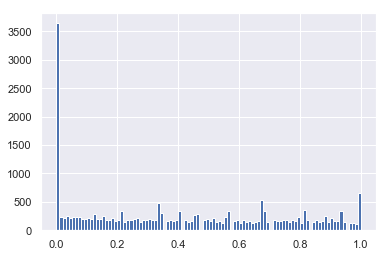

In [127]:
INT_df["PERS_openness_p"].hist(bins=100)

In [215]:
pattern = "|".join(pers_variables)
name = "PERS_emotional_stability_r"
corr_type = "spearman"
df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r,p,N
budget_normalised,0.07,0.00,8056
TMB_genres_Action,0.04,0.00,21576
TMB_original_title_differs_from_title,0.04,0.00,21576
TMB_original_language_Italian,0.04,0.00,21576
TMB_original_language_Hindi,0.04,0.00,21576
TMB_cast_Ajay Devgn,0.04,0.00,21126
TMB_keyword_martial arts,0.03,0.00,16118
TMB_production_countries_India,0.03,0.00,20170
TMB_spoken_languages_Hindi,0.03,0.00,20930
TMB_crew_Norman McLaren,0.03,0.00,21491


In [268]:
pers_variables

['PERS_agreeableness_mean',
 'PERS_agreeableness_r',
 'PERS_agreeableness_std',
 'PERS_conscientiousness_mean',
 'PERS_conscientiousness_r',
 'PERS_conscientiousness_std',
 'PERS_emotional_stability_mean',
 'PERS_emotional_stability_r',
 'PERS_emotional_stability_std',
 'PERS_extraversion_mean',
 'PERS_extraversion_r',
 'PERS_extraversion_std',
 'PERS_openness_mean',
 'PERS_openness_r',
 'PERS_openness_std']

Wall time: 5.51 s


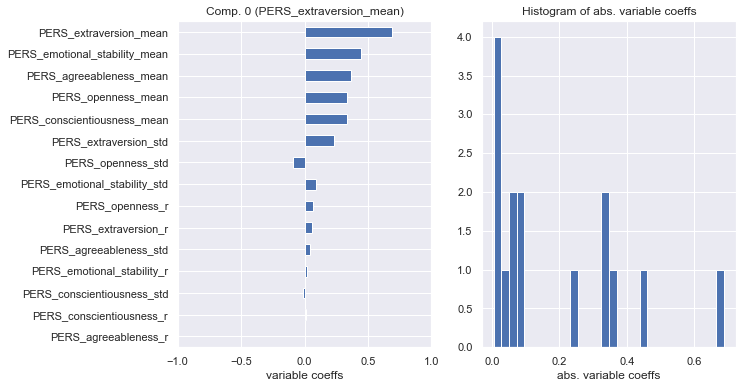

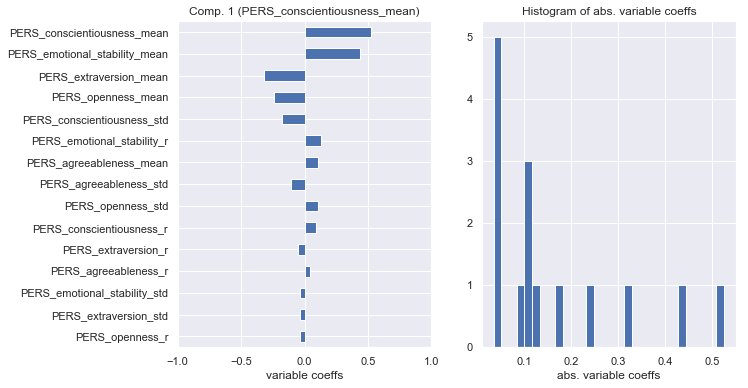

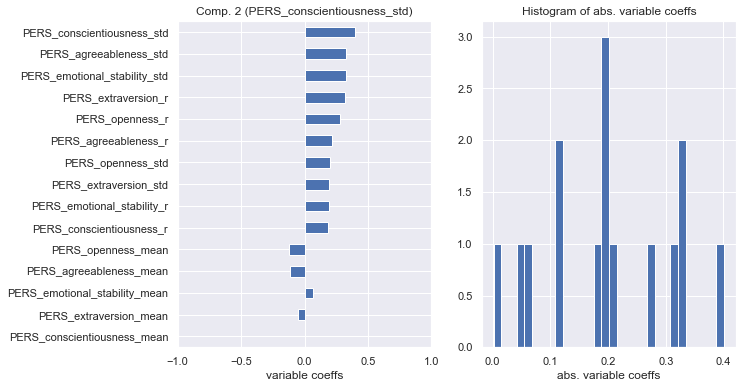

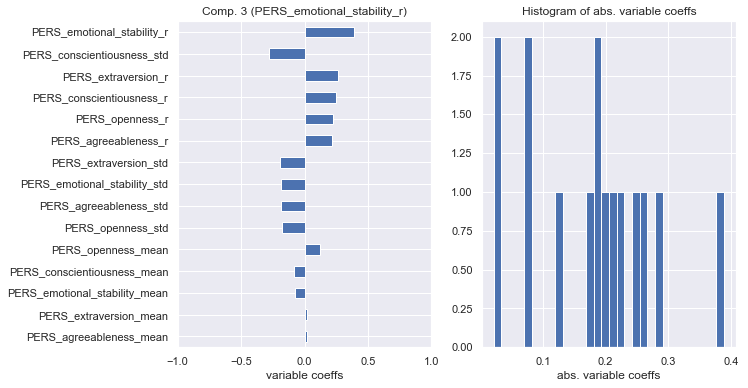

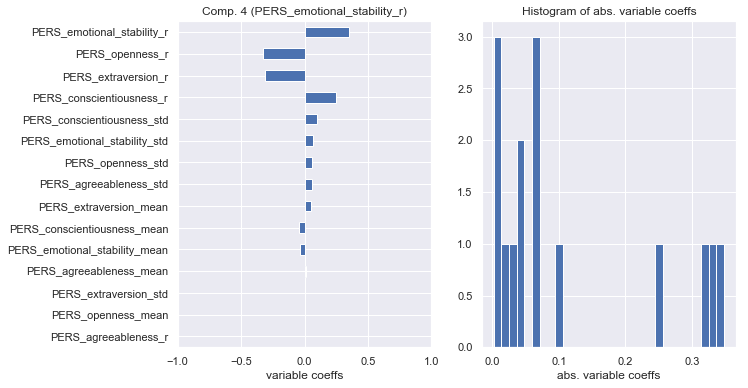

In [240]:
%%time

df = INT_df[pers_variables].copy()

df = df.fillna(df.mean())




output_subfolder = ".."+os.sep+"Output"+os.sep + "personality_fusion" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    

# standardise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df.columns,
                             index   = df.index      )



n_components = BES_std.shape[1]
n_components = 5
alpha = 10
decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp = SparsePCA(n_components = n_components, alpha = alpha)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df.index)



load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method


# display_pca_data(n_components, decomp, BES_std)



(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df.columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = True)

,noise_variance_
PERS_extraversion_mean,0.418983
PERS_conscientiousness_mean,0.603408
PERS_emotional_stability_mean,0.604933
PERS_emotional_stability_r,0.673315
PERS_conscientiousness_std,0.716819
PERS_extraversion_r,0.722276
PERS_openness_r,0.759299
PERS_openness_mean,0.798923
PERS_conscientiousness_r,0.832983
PERS_agreeableness_mean,0.839357


,noise_variance_
PERS_agreeableness_r,0.905144
PERS_openness_std,0.908726


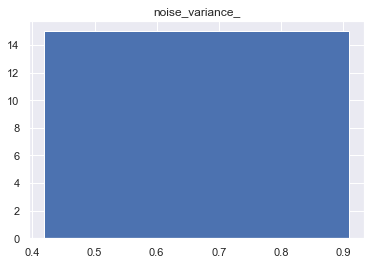

In [241]:
# SUPER USEFUL FOR FEATURE EXTRACTION/VARIABLE PREP!

if hasattr(decomp, 'noise_variance_'):
    if not isinstance(decomp.noise_variance_, float):
        NoiseVariance = pd.DataFrame( decomp.noise_variance_ , index = BES_std.columns, columns = ["noise_variance_"])
        NoiseVariance.hist( bins = int(len( NoiseVariance )/10) )
        NoiseVariance = NoiseVariance.sort_values(by="noise_variance_")
        display( NoiseVariance )
        display( NoiseVariance[ NoiseVariance["noise_variance_"]>.9 ].sort_index() )

In [282]:
Fusion

,PERS_0,PERS_1,PERS_2,PERS_3,PERS_4,Quality,Exposure
movieId,,,,,,,
1,2.241637e-01,-1.141266e-01,2.397888e-01,-1.901254e-01,8.523637e-02,0.007607,0.017591
2,2.341940e-01,-5.939194e-02,1.836070e-01,-1.974765e-01,4.214850e-02,0.000093,0.001983
3,3.249067e-01,1.605309e-01,4.659174e-01,-4.048151e-01,9.813285e-02,0.000102,0.002209
4,3.922443e-01,-1.913760e-01,8.682715e-01,-5.828259e-01,2.429891e-01,-0.004731,0.001812
5,2.694286e-01,-2.040446e-02,3.998050e-01,-1.315527e-01,-8.936328e-02,-0.003309,-0.002237
6,1.758687e-01,6.591029e-02,1.832040e-01,-1.754171e-01,2.602842e-02,0.008866,0.010710
7,5.846143e-01,2.273172e-02,1.280768e-01,-1.566148e-01,5.183412e-02,0.003531,0.004202
8,6.745671e-02,7.025018e-02,4.615698e-01,5.861293e-01,7.455203e-01,-0.004468,-0.004617
9,4.889184e-01,3.767074e-01,5.080058e-02,-6.047550e-01,6.169061e-01,-0.004272,-0.000718


In [243]:
Quality.replace( Quality.value_counts().head(1).index[0] , np.nan, inplace=True )
Exposure.replace( Exposure.value_counts().head(1).index[0] , np.nan, inplace=True )

Quality  = BES_decomp[0].copy()
Exposure = BES_decomp[1].copy()

Fusion = BES_decomp.copy()
Fusion.columns = ["PERS_0","PERS_1","PERS_2","PERS_3","PERS_4"]

Fusion["Quality" ] = Quality
Fusion["Exposure"] = Exposure

In [283]:
for col in Fusion.columns:
    Fusion[col].replace( Fusion[col].value_counts().head(1).index[0] , np.nan, inplace=True )

In [284]:
Fusion.isnull().sum()

PERS_0      24189
PERS_1      24189
PERS_2      24189
PERS_3      24189
PERS_4      24189
Quality      3656
Exposure     3656
dtype: int64

In [287]:
Fusion.to_msgpack(Dataset_directory+"Processed"+os.sep+"Fusion"+".msgpack")

In [ ]:
#########################################################
# cast/crew aggregate variables

In [252]:
aggregate_vars = [x for x in INT_df.columns if re.search("(_crew|_cast)(_lead$|_mean$|_lead10$|_lead5$)",x)]
# aggregate_vars

In [253]:
aggregate_vars_reduced = [x for x in INT_df.columns if re.search("(_crew|_cast)(_lead10$|_lead5$)",x)]
aggregate_vars_reduced

['gender_guess_integrated_crew_lead5',
 'gender_guess_integrated_cast_lead10',
 'credit_number_crew_lead5',
 'credit_number_cast_lead10',
 'job_number_crew_lead5',
 'department_number_crew_lead5',
 'mean_order_crew_lead5',
 'mean_order_cast_lead10',
 'fractional_mean_order_crew_lead5',
 'fractional_mean_order_cast_lead10',
 'importulence_crew_lead5',
 'importulence_cast_lead10']

In [265]:
aggregate_vars_reduced.append("TMB_crew_size")
aggregate_vars_reduced.append("TMB_cast_size")
aggregate_vars_reduced.append("SER_num_starring")

Wall time: 58.1 s


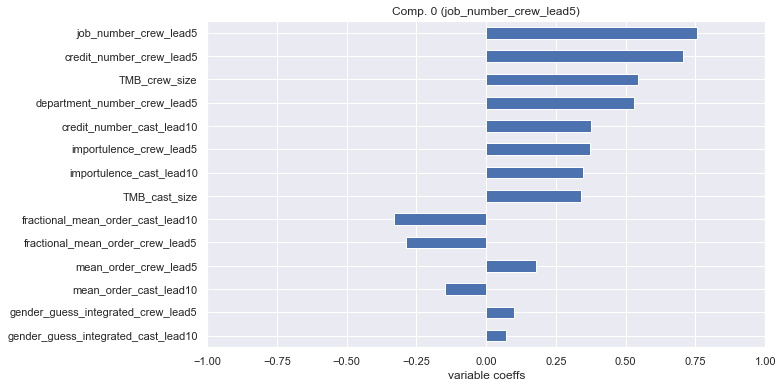

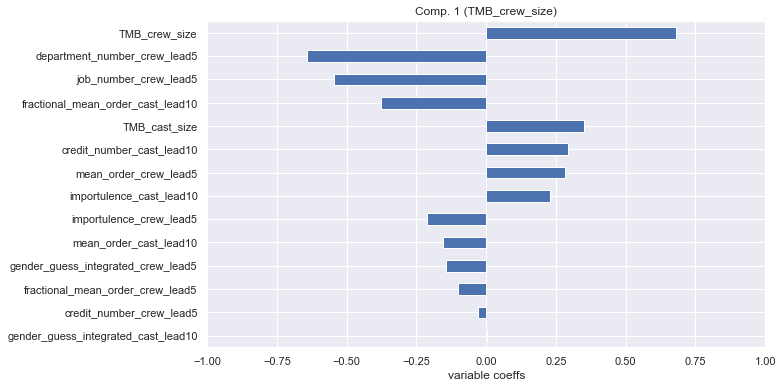

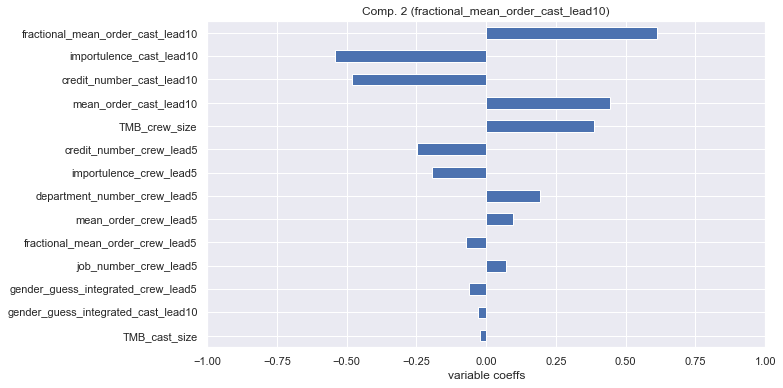

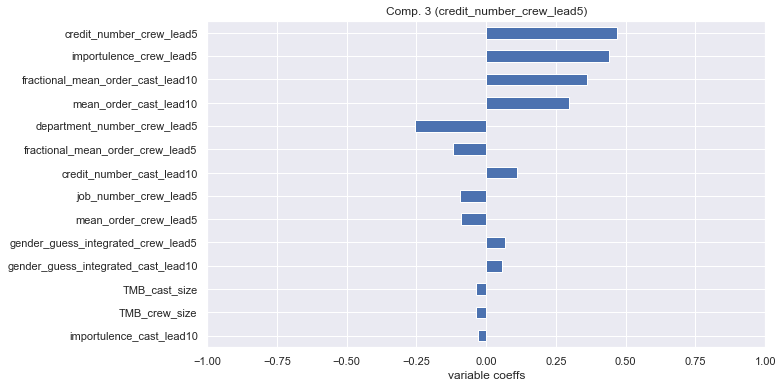

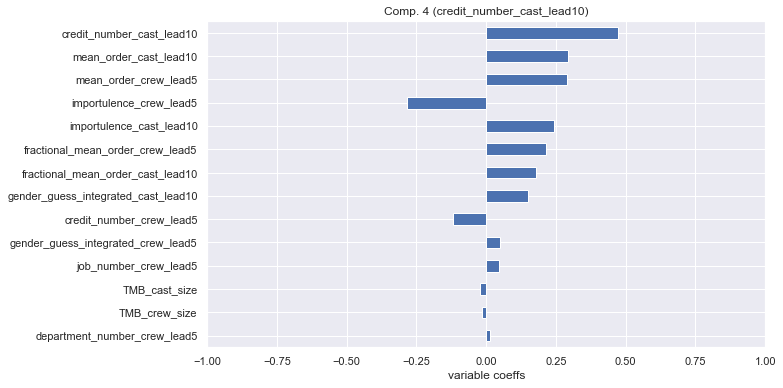

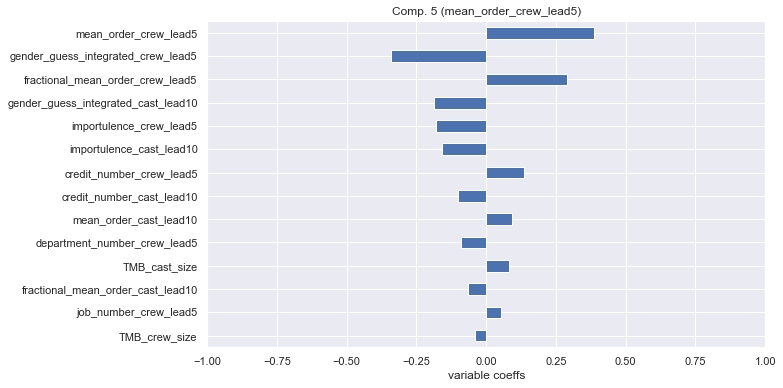

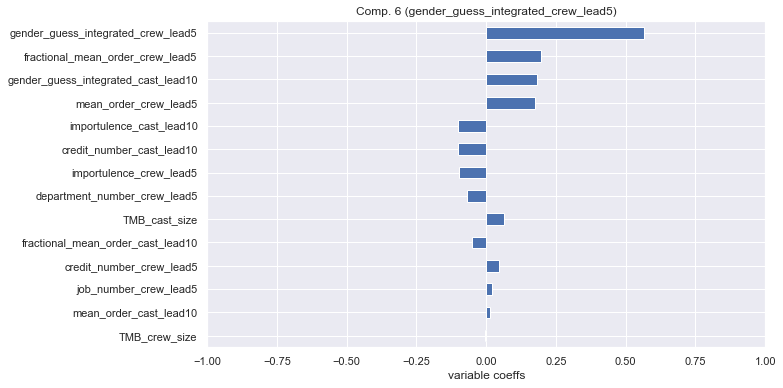

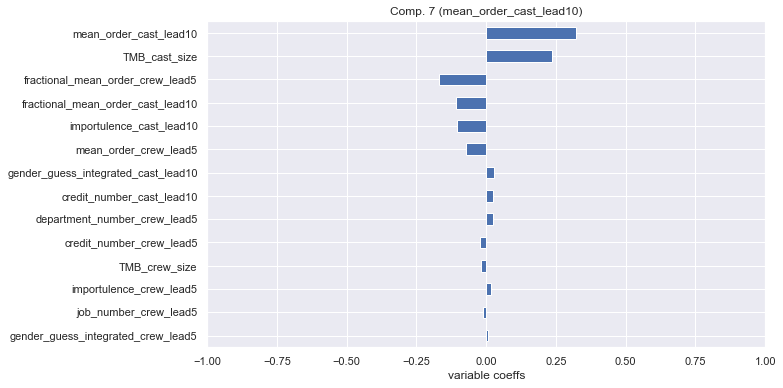

In [266]:
%%time

df = INT_df[aggregate_vars_reduced].copy()

df = df.fillna(df.mean())




output_subfolder = ".."+os.sep+"Output"+os.sep + "cast_crew_aggregate_fusion" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    

# standardise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(df.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = df.columns,
                             index   = df.index      )



n_components = BES_std.shape[1]
n_components = 8
alpha = 1
# decomp = PCA(n_components = n_components,svd_solver='full')
decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp = SparsePCA(n_components = n_components, alpha = alpha)
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = df.index)



load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method


# display_pca_data(n_components, decomp, BES_std)



(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          df.columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 10, show_histogram = False)

In [ ]:
# comp 0: unspecialised crew, done a lot, cast also done quite a bit (job_number_crew_lead5)
# comp 1: cast done a lot, crew specialised (importulence_cast_lead10)
# comp 2: crew prominence (importulence_crew_lead5)
# comp 3: gender balance crew, weaker gender balance cast (_lead5/10 heading/equal head)
# comp 4: (mean_order_cast_mean) cast crew mean order/fractional mean order (opposite of importulence/department number)
# comp 5: (fractional_mean_order_crew_lead5) prominent, male-skew crew and female skew cast (horror?)
# comp 6: (fractional_mean_order_crew_lead5) prominent, female-skew crew and male skew cast (documentary???)
# comp 7: (mean_order_cast_lead) low prominence female-skew cast who've been in a lot of movies
# comp 8: (fractional_mean_order_cast_mean) 

In [261]:
# SUPER USEFUL FOR FEATURE EXTRACTION/VARIABLE PREP!

if hasattr(decomp, 'noise_variance_'):
    if not isinstance(decomp.noise_variance_, float):
        NoiseVariance = pd.DataFrame( decomp.noise_variance_ , index = BES_std.columns, columns = ["noise_variance_"])
        NoiseVariance.hist( bins = int(len( NoiseVariance )/10) )
        NoiseVariance = NoiseVariance.sort_values(by="noise_variance_")
        display( NoiseVariance )
        display( NoiseVariance[ NoiseVariance["noise_variance_"]>.9 ].sort_index() )

In [ ]:
# least connected to other variables - gender_guess_integrated_cast_lead

In [264]:
pattern = "|".join(aggregate_vars)
pattern = "TMB_crew_size"
name = "TMB_crew_size"
corr_type = "spearman"
df,corr_type = make_corr_summary(INT_df_ord_only, name, corr_type, pattern=pattern)
display_corr(df, name, corr_type, text_wrap_length=50)


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r,p,N
mean_order_crew_mean,0.78,0.00,42108
mean_order_crew_lead5,0.52,0.00,42060
TMB_num_production_companies,0.49,0.00,44591
TMB_popularity_normalised,0.49,0.00,44591
TMB_vote_count,0.48,0.00,44591
TMB_cast_size,0.47,0.00,42601
budget_normalised,0.45,0.00,9809
gross_normalised,0.43,0.00,8536
credit_number_crew_lead5,0.42,0.00,44591
HETREC_rtAudienceNumRatings,0.37,0.00,9901
